## Final Project Submission

Please fill out:
* Student name: Jenipher Oduor
* Student pace: part time  
* Scheduled project review date/time: 
* Instructor name:George Kamundia 
* Blog post URL:


In [1]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#Load Box Office Mojo dataset

bom_df = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Load IMDB dataset
conn = sqlite3.connect("./zippedData/im.db/im.db")



In [4]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
query = """
SELECT 
    mb.primary_title,
    mb.start_year,
    mb.genres,
    mb.runtime_minutes,
    mr.averagerating,
    mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr
    ON mb.movie_id = mr.movie_id;
"""

df = pd.read_sql_query(query, conn)

df.head()

,primary_title,start_year,genres,runtime_minutes,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",175.0,7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",114.0,7.2,43
2,The Other Side of the Wind,2018,Drama,122.0,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",NaN,6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",80.0,6.5,119


In [6]:
#Split genres that are in one row but separated by commas
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

#Analyze average rating by genre
genre_avg = df.groupby('genres')['averagerating'].mean().round(2).sort_values(ascending=False)
print(genre_avg)

genres
Short          8.80
Documentary    7.33
Game-Show      7.30
News           7.27
Biography      7.16
Music          7.09
History        7.04
Sport          6.96
War            6.58
Reality-TV     6.50
Musical        6.50
Drama          6.40
Family         6.39
Animation      6.25
Adventure      6.20
Romance        6.15
Crime          6.12
Comedy         6.00
Fantasy        5.92
Mystery        5.92
Western        5.87
Action         5.81
Thriller       5.64
Sci-Fi         5.49
Horror         5.00
Adult          3.77
Name: averagerating, dtype: float64


C:\Users\jenip\AppData\Local\Temp\ipykernel_3796\3674639544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')


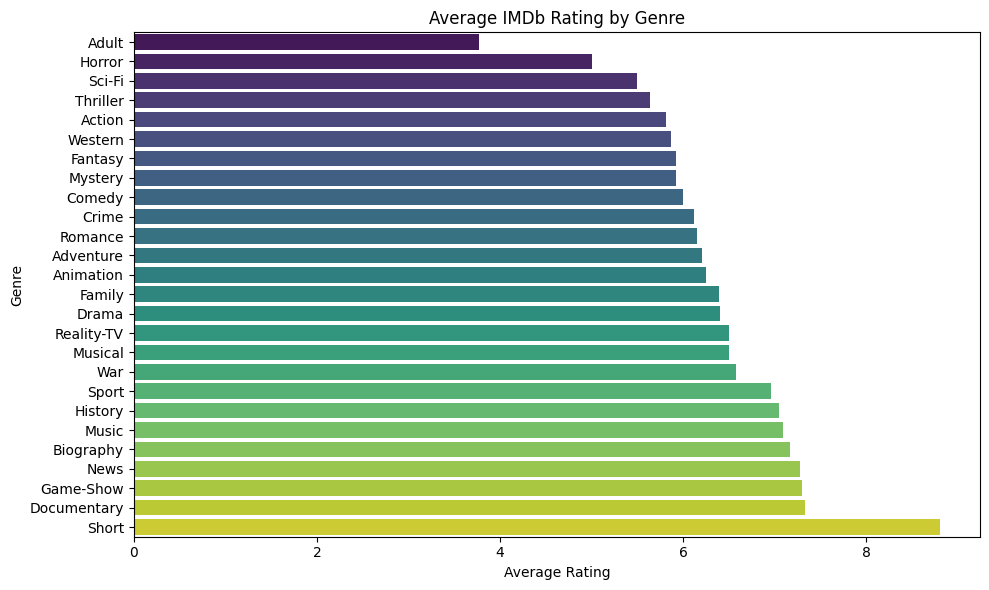

In [7]:
# Visualization of average rating per genre
genre_avg = df.groupby('genres')['averagerating'].mean().round(2).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')

plt.title('Average IMDb Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Recommendation 1 - Short movies are recommended as they have a high rating.

What movie runtimes are more commercially viable

In [8]:
print(df.columns)



Index(['primary_title', 'start_year', 'genres', 'runtime_minutes',
       'averagerating', 'numvotes'],
      dtype='object')


In [9]:
#Replace rows with missing runtimes with the median value

median_runtime = df['runtime_minutes'].median()
df['runtime_minutes'].fillna(median_runtime, inplace=True)


In [10]:
# Bin runtimes
bins = [0, 60, 90, 120, 150, 180, 300]
labels = ['<60 min', '60–90 min', '90–120 min', '120–150 min', '150–180 min', '180+ min']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=bins, labels=labels)


In [11]:
runtime_analysis = df.groupby('runtime_group')['numvotes'].agg(['count', 'mean']).reset_index()
runtime_analysis.columns = ['Runtime Group', 'Number of Movies', 'Avg Number of Votes']
print(runtime_analysis)


  Runtime Group  Number of Movies  Avg Number of Votes
0       <60 min              7182            69.976051
1     60–90 min             49762          1022.715526
2    90–120 min             59762          6325.031391
3   120–150 min             10073         21305.206890
4   150–180 min              2144         18474.965019
5      180+ min               304          6538.792763


C:\Users\jenip\AppData\Local\Temp\ipykernel_3796\3742179271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runtime_analysis, x='Avg Number of Votes', y='Runtime Group', palette='mako')


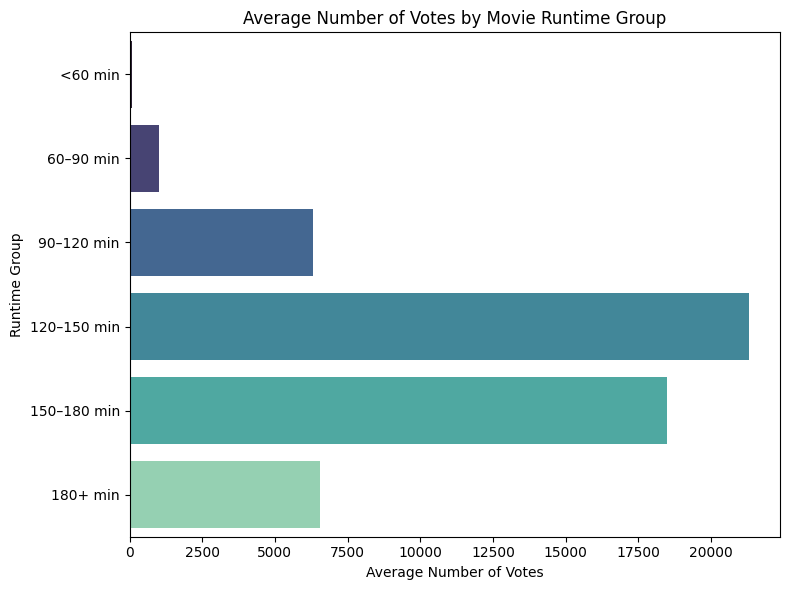

In [12]:
#Visualization of average number of votes per movie runtime

plt.figure(figsize=(8, 6))
sns.barplot(data=runtime_analysis, x='Avg Number of Votes', y='Runtime Group', palette='mako')
plt.title('Average Number of Votes by Movie Runtime Group')
plt.xlabel('Average Number of Votes')
plt.ylabel('Runtime Group')
plt.tight_layout()
plt.show()

Recommendation 2
Movies with a runtime of 120-150 minutes are more commercially viable

Recommendation 3


In [13]:
combined_df = pd.merge(df, bom_df, left_on='primary_title', right_on='title', how='inner')

In [14]:
combined_df.head()

,primary_title,start_year,genres,runtime_minutes,averagerating,numvotes,runtime_group,title,studio,domestic_gross,foreign_gross,year
0,Wazir,2016,Action,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016
1,Wazir,2016,Crime,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016
2,Wazir,2016,Drama,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016
3,On the Road,2012,Adventure,124.0,6.1,37886,120–150 min,On the Road,IFC,744000.0,8000000,2012
4,On the Road,2012,Drama,124.0,6.1,37886,120–150 min,On the Road,IFC,744000.0,8000000,2012


In [15]:
# Clean and convert both columns to numeric
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

combined_df['gross_revenue'] = bom_df['domestic_gross'] + bom_df['foreign_gross']


In [16]:
combined_df.head()

,primary_title,start_year,genres,runtime_minutes,averagerating,numvotes,runtime_group,title,studio,domestic_gross,foreign_gross,year,gross_revenue
0,Wazir,2016,Action,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016,1.067000e+09
1,Wazir,2016,Crime,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016,1.025500e+09
2,Wazir,2016,Drama,103.0,7.1,15378,90–120 min,Wazir,Relbig.,1100000.0,NaN,2016,9.603000e+08
3,On the Road,2012,Adventure,124.0,6.1,37886,120–150 min,On the Road,IFC,744000.0,8000000,2012,8.283000e+08
4,On the Road,2012,Drama,124.0,6.1,37886,120–150 min,On the Road,IFC,744000.0,8000000,2012,7.526000e+08


In [17]:
# Explode genres
combined_df['genre_list'] = combined_df['genres'].str.split(',')
combined_exploded = combined_df.explode('genre_list')

# Group by genre
genre_revenue = combined_exploded.groupby('genre_list')['gross_revenue'].mean().sort_values(ascending=False)
print(genre_revenue.head(10))


genre_list
Western        2.412600e+08
Sport          2.169228e+08
Animation      1.880551e+08
Crime          1.503324e+08
Sci-Fi         1.469467e+08
Adventure      1.449443e+08
Documentary    1.315555e+08
Action         1.282259e+08
Biography      1.239520e+08
Drama          1.198135e+08
Name: gross_revenue, dtype: float64


C:\Users\jenip\AppData\Local\Temp\ipykernel_3796\4254308125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='viridis')


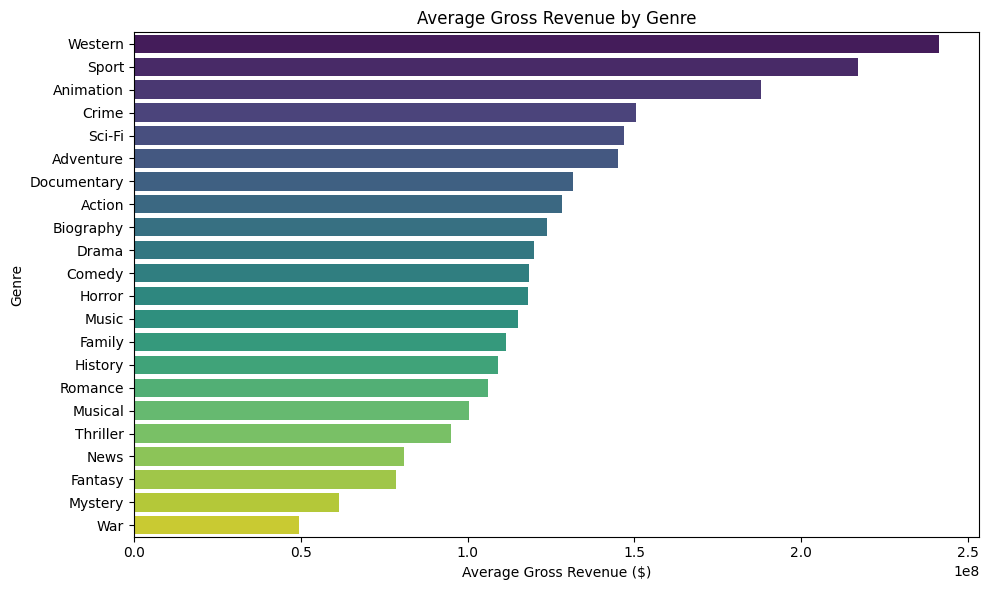

In [18]:
#Visualization of average gross revenue by genre

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='viridis')
plt.title('Average Gross Revenue by Genre')
plt.xlabel('Average Gross Revenue ($)')
plt.ylabel('Genre')
plt.tight_layout()

Recommendation 3
Recommend creation of movies of Western, Sport and Animation genre as they generate significantly higher revenue compared to other genres.